In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
from scipy import stats
import math
from sklearn.linear_model import LinearRegression

In [96]:
taxi_testm = pd.read_csv('taxi_testm.csv')

In [99]:
taxi_testm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49642 entries, 0 to 49641
Data columns (total 41 columns):
pickup_dt                             49642 non-null object
dropoff_dt                            49642 non-null object
trip_distance                         49642 non-null float64
RatecodeID                            49642 non-null int64
PULocationID                          49642 non-null int64
DOLocationID                          49642 non-null int64
fare_amount                           49642 non-null float64
tip_amount                            49642 non-null float64
tolls_amount                          49642 non-null float64
trip_time                             49642 non-null float64
apparentTemperature                   49642 non-null float64
weather_summary_Clear                 49642 non-null int64
weather_summary_Heavy Rain            49642 non-null int64
weather_summary_Humid and Overcast    49642 non-null int64
weather_summary_Light Rain            49642 non-nul

In [101]:
taxi_testm.drop(['Unnamed: 0', 'time_of_day'], axis=1, inplace=True)

In [138]:
f='tip_amount~fare_amount+tolls_amount+RatecodeID_1+RatecodeID_2+RatecodeID_3+RatecodeID_4+payment_type_1+payment_type_2'
taxi_model1 = ols(f, taxi_testm).fit()
taxi_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tip_amount   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     9036.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:49:09   Log-Likelihood:                -91843.
No. Observations:               48845   AIC:                         1.837e+05
Df Residuals:                   48836   BIC:                         1.838e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.9376      0.179    -27.554      0.000      -5.289      -4.586
fare_amount        0.1089      0.001    118.072      0.000       0.107       0.111
tolls_amount       0.2342      0.007     35.985      0.000       0.221       0.247
RatecodeID_1       3.1704      0.144     22.039      0.000       2.888       3.452
RatecodeID_2       3.4110      0.147     23.219      0.000       3.123       3.699
RatecodeID_3       3.0224      0.232     13.020      0.000       2.567       3.477
RatecodeID_4       4.0955      0.283     14.487      0.000       3.541       4.650
payment_type_1     2.8941      0.103     28.036      0.000       2.692       3.096
payment_type_2     0.3342      0.104      3.222      0.001       0.131       0.538
==============================================================================
Omnibus:                    33643.719   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19422687.675
Skew:                           2.038   Prob(JB):                         0.00
Kurtosis:                     100.605   Cond. No.                         866.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# creating second dataframe to test different model excluding 0 tip amounts
taxi_testm2 = taxi_testm[taxi_testm.tip_amount != 0]

In [137]:
# clearly much better
f='tip_amount~fare_amount+tolls_amount+RatecodeID_1+RatecodeID_2+RatecodeID_3+RatecodeID_4'
taxi_model2 = ols(f, taxi_testm2).fit()
taxi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tip_amount   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                 2.044e+04
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:48:56   Log-Likelihood:                -52006.
No. Observations:               32788   AIC:                         1.040e+05
Df Residuals:                   32781   BIC:                         1.041e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.6155      0.198     -8.166      0.000      -2.003      -1.228
fare_amount      0.1846      0.001    207.941      0.000       0.183       0.186
tolls_amount     0.2291      0.006     38.564      0.000       0.217       0.241
RatecodeID_1     1.9046      0.195      9.755      0.000       1.522       2.287
RatecodeID_2     1.9415      0.193     10.047      0.000       1.563       2.320
RatecodeID_3     1.6408      0.251      6.543      0.000       1.149       2.132
RatecodeID_4     2.0257      0.306      6.609      0.000       1.425       2.626
==============================================================================
Omnibus:                    38453.490   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        110395768.601
Skew:                           5.069   Prob(JB):                         0.00
Kurtosis:                     287.085   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
# testing interaction variable to see if multicolinear variables can be used in some way
taxi_testm['fare_dist_interact'] = taxi_testm.fare_amount*taxi_testm.trip_distance

In [106]:
# correlation is lower than just fare amount so this wasn't used
taxi_testm.head()
taxi_testm.corr()['tip_amount']['fare_dist_interact']

0.5203980448939901

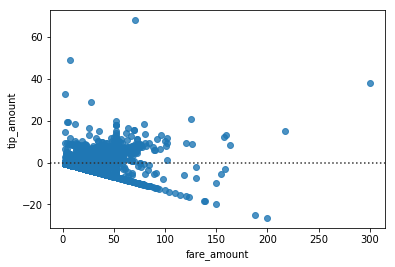

In [107]:
sns.residplot('fare_amount', 'tip_amount', taxi_testm)

In [108]:
# log transformation
taxi_testm['log_tip'] = np.log(taxi_testm.tip_amount)

C:\Users\dlm66\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [109]:
taxi_testm.head()

,pickup_dt,dropoff_dt,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,trip_time,...,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,payment_type_1,payment_type_2,payment_type_3,payment_type_4,fare_dist_interact,log_tip
0,2018-10-25 10:01:35,2018-10-25 10:13:57,1.70,1,262,229,9.5,0.00,0.00,12.366667,...,0,0,0,0,0,1,0,0,16.150,-inf
1,2018-10-05 20:17:42,2018-10-05 20:37:16,3.23,1,249,87,15.5,3.36,0.00,19.566667,...,0,0,0,0,1,0,0,0,50.065,1.211941
2,2018-10-15 09:24:44,2018-10-15 09:42:57,2.66,1,100,236,13.5,0.00,0.00,18.216667,...,0,0,0,0,0,1,0,0,35.910,-inf
3,2018-10-25 16:10:09,2018-10-25 16:18:11,0.90,1,264,264,7.0,1.00,0.00,8.033333,...,0,0,0,0,1,0,0,0,6.300,0.000000
4,2018-10-10 18:56:38,2018-10-10 19:51:10,18.37,2,132,48,52.0,12.61,5.76,54.533333,...,1,0,0,0,1,0,0,0,955.240,2.534490


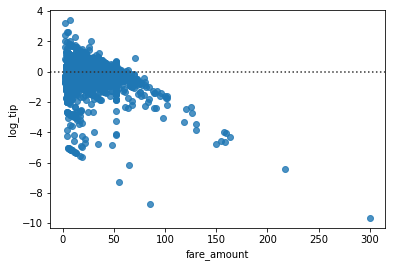

In [113]:
# not much improvement
sns.residplot('fare_amount', 'log_tip', taxi_testm2)

In [114]:
# correlations are lower, made identical here because there is no log of 0
taxi_testm2.corr()['log_tip'], taxi_testm2.corr()['tip_amount']

(trip_distance                    0.718395
 RatecodeID                       0.336355
 PULocationID                    -0.076253
 DOLocationID                    -0.088818
 fare_amount                      0.760974
 tip_amount                       0.856484
 tolls_amount                     0.499625
 trip_time                        0.143804
 weather_summary_Light Rain      -0.008642
 weather_summary_Mostly Cloudy   -0.004389
 RatecodeID_1                    -0.386989
 RatecodeID_2                     0.354538
 RatecodeID_3                     0.113755
 RatecodeID_4                     0.073067
 RatecodeID_5                     0.073229
 payment_type_1                   0.001040
 payment_type_2                  -0.001040
 payment_type_3                        NaN
 payment_type_4                        NaN
 fare_dist_interact               0.572928
 log_tip                          1.000000
 Name: log_tip, dtype: float64, trip_distance                    0.830090
 RatecodeID            

In [115]:
taxi_testm[taxi_testm.tip_amount == 0].shape

(16301, 23)

In [116]:
# testing log transformation on fare amount
taxi_testm['log_fare'] = np.log(taxi_testm.fare_amount)

In [117]:
# similar correlations, but still lower so ultimately scrapped
taxi_testm.corr()['tip_amount']['log_fare'], taxi_testm.corr()['log_tip']['log_fare']

(0.542594211066908, 0.8094369166270918)

In [118]:
# standardizing tips for both dataframes
taxi_testm['tip_standard'] = (taxi_testm.tip_amount - np.mean(taxi_testm.tip_amount))/np.std(taxi_testm.tip_amount)
taxi_testm2['tip_standard'] = (taxi_testm2.tip_amount - np.mean(taxi_testm2.tip_amount))/np.std(taxi_testm2.tip_amount)

C:\Users\dlm66\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
# dropping all columns where there was little to zero correlation
taxi_testm.drop(['apparentTemperature', 'weather_summary_Clear', 'weather_summary_Heavy Rain', 
                 'weather_summary_Humid and Overcast', 'weather_summary_Overcast', 'weather_summary_Overcast',
                'weather_summary_Partly Cloudy', 'weather_summary_Rain', 'passenger_count_1', 'passenger_count_2', 
                 'passenger_count_3', 'passenger_count_4', 'passenger_count_5', 'passenger_count_6', 'day_of_week_0',
                'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6'], 
                axis=1, inplace = True)
taxi_testm2.drop(['apparentTemperature', 'weather_summary_Clear', 'weather_summary_Heavy Rain', 
                 'weather_summary_Humid and Overcast', 'weather_summary_Overcast', 'weather_summary_Overcast',
                'weather_summary_Partly Cloudy', 'weather_summary_Rain', 'passenger_count_1', 'passenger_count_2', 
                 'passenger_count_3', 'passenger_count_4', 'passenger_count_5', 'passenger_count_6', 'day_of_week_0',
                'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6'], 
                axis=1, inplace = True)

Index(['pickup_dt', 'dropoff_dt', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'fare_amount', 'tip_amount',
       'tolls_amount', 'trip_time', 'weather_summary_Light Rain',
       'weather_summary_Mostly Cloudy', 'RatecodeID_1', 'RatecodeID_2',
       'RatecodeID_3', 'RatecodeID_4', 'RatecodeID_5', 'payment_type_1',
       'payment_type_2', 'payment_type_3', 'payment_type_4',
       'fare_dist_interact', 'log_tip', 'log_fare', 'tip_standard'],
      dtype='object')

In [59]:
display(taxi_testm.head())
taxi_testm2.head()

,pickup_dt,dropoff_dt,trip_distance,fare_amount,tip_amount,tolls_amount,trip_time,weather_summary_Light Rain,weather_summary_Mostly Cloudy,RatecodeID_1,...,RatecodeID_4,RatecodeID_5,payment_type_1,payment_type_2,payment_type_3,payment_type_4,fare_dist_interact,log_tip,log_fare,tip_standard
0,2018-10-25 10:01:35,2018-10-25 10:13:57,1.70,9.5,0.00,0.00,12.366667,0,0,1,...,0,0,0,1,0,0,16.150,-inf,2.251292,-0.763978
1,2018-10-05 20:17:42,2018-10-05 20:37:16,3.23,15.5,3.36,0.00,19.566667,0,1,1,...,0,0,1,0,0,0,50.065,1.211941,2.740840,0.576827
2,2018-10-15 09:24:44,2018-10-15 09:42:57,2.66,13.5,0.00,0.00,18.216667,0,0,1,...,0,0,0,1,0,0,35.910,-inf,2.602690,-0.763978
3,2018-10-25 16:10:09,2018-10-25 16:18:11,0.90,7.0,1.00,0.00,8.033333,0,0,1,...,0,0,1,0,0,0,6.300,0.000000,1.945910,-0.364929
4,2018-10-10 18:56:38,2018-10-10 19:51:10,18.37,52.0,12.61,5.76,54.533333,0,1,0,...,0,0,1,0,0,0,955.240,2.534490,3.951244,4.268033


,pickup_dt,dropoff_dt,trip_distance,fare_amount,tip_amount,tolls_amount,trip_time,weather_summary_Light Rain,weather_summary_Mostly Cloudy,RatecodeID_1,...,RatecodeID_3,RatecodeID_4,RatecodeID_5,payment_type_1,payment_type_2,payment_type_3,payment_type_4,fare_dist_interact,log_tip,tip_standard
1,2018-10-05 20:17:42,2018-10-05 20:37:16,3.23,15.5,3.36,0.00,19.566667,0,1,1,...,0,0,0,1,0,0,0,50.065,1.211941,0.197092
3,2018-10-25 16:10:09,2018-10-25 16:18:11,0.90,7.0,1.00,0.00,8.033333,0,0,1,...,0,0,0,1,0,0,0,6.300,0.000000,-0.715886
4,2018-10-10 18:56:38,2018-10-10 19:51:10,18.37,52.0,12.61,5.76,54.533333,0,1,0,...,0,0,0,1,0,0,0,955.240,2.534490,3.775503
7,2018-10-21 16:01:41,2018-10-21 16:32:24,3.40,19.5,4.05,0.00,30.716667,0,0,1,...,0,0,0,1,0,0,0,66.300,1.398717,0.464022
8,2018-10-16 08:41:22,2018-10-16 09:11:35,8.06,28.5,2.00,0.00,30.216667,0,0,1,...,0,0,0,1,0,0,0,229.710,0.693147,-0.329031


In [60]:
# making sure correlations are unchanged
taxi_testm.corr()['tip_standard'], taxi_testm.corr()['tip_amount']

(trip_distance                    0.565635
 fare_amount                      0.596066
 tip_amount                       1.000000
 tolls_amount                     0.470548
 trip_time                        0.090498
 weather_summary_Light Rain      -0.009950
 weather_summary_Mostly Cloudy   -0.002162
 RatecodeID_1                    -0.372569
 RatecodeID_2                     0.336301
 RatecodeID_3                     0.141668
 RatecodeID_4                     0.086259
 RatecodeID_5                     0.058264
 payment_type_1                   0.490945
 payment_type_2                  -0.485093
 payment_type_3                  -0.047355
 payment_type_4                  -0.025444
 fare_dist_interact               0.520398
 log_tip                          0.856484
 log_fare                         0.542594
 tip_standard                     1.000000
 Name: tip_standard, dtype: float64, trip_distance                    0.565635
 fare_amount                      0.596066
 tip_amount       

In [84]:
# unfortunately no improvements to the model
f='tip_amount~fare_amount+tolls_amount+RatecodeID_1+RatecodeID_2+RatecodeID_3+RatecodeID_4+payment_type_1+payment_type_2'
taxi_model1 = ols(f, taxi_testm).fit()
taxi_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tip_amount   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     8912.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:43:47   Log-Likelihood:                -93939.
No. Observations:               49642   AIC:                         1.879e+05
Df Residuals:                   49633   BIC:                         1.880e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.0017      0.179    -27.960      0.000      -5.352      -4.651
fare_amount        0.1082      0.001    116.684      0.000       0.106       0.110
tolls_amount       0.2388      0.007     36.540      0.000       0.226       0.252
RatecodeID_1       3.2192      0.144     22.433      0.000       2.938       3.500
RatecodeID_2       3.4466      0.147     23.518      0.000       3.159       3.734
RatecodeID_3       3.0537      0.234     13.062      0.000       2.595       3.512
RatecodeID_4       4.1831      0.285     14.677      0.000       3.624       4.742
payment_type_1     2.9198      0.103     28.353      0.000       2.718       3.122
payment_type_2     0.3584      0.104      3.463      0.001       0.156       0.561
==============================================================================
Omnibus:                    39662.123   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25624522.331
Skew:                           2.666   Prob(JB):                         0.00
Kurtosis:                     114.176   Cond. No.                         864.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# standardizing total fare for both frames
taxi_testm['fare_standard'] = (taxi_testm.fare_amount - np.mean(taxi_testm.fare_amount))/np.std(taxi_testm.fare_amount)
taxi_testm2['fare_standard'] = (taxi_testm2.fare_amount - np.mean(taxi_testm2.fare_amount))/np.std(taxi_testm2.fare_amount)

C:\Users\dlm66\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [219]:
# once again no changes
f='tip_amount~fare_amount+tolls_amount+RatecodeID_1+RatecodeID_2+RatecodeID_3+RatecodeID_4'
taxi_model2 = ols(f, taxi_testm2).fit()
taxi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tip_amount   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                 2.044e+04
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:43:10   Log-Likelihood:                -52006.
No. Observations:               32788   AIC:                         1.040e+05
Df Residuals:                   32781   BIC:                         1.041e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.6155      0.198     -8.166      0.000      -2.003      -1.228
fare_amount      0.1846      0.001    207.941      0.000       0.183       0.186
tolls_amount     0.2291      0.006     38.564      0.000       0.217       0.241
RatecodeID_1     1.9046      0.195      9.755      0.000       1.522       2.287
RatecodeID_2     1.9415      0.193     10.047      0.000       1.563       2.320
RatecodeID_3     1.6408      0.251      6.543      0.000       1.149       2.132
RatecodeID_4     2.0257      0.306      6.609      0.000       1.425       2.626
==============================================================================
Omnibus:                    38453.490   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        110395768.601
Skew:                           5.069   Prob(JB):                         0.00
Kurtosis:                     287.085   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
# kmporting data to test on
taxi_jan = pd.read_csv('yellow_tripdata_2018-01.csv')

In [77]:
taxi_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [82]:
taxi_jan.iloc[4,:]

VendorID                                   1
tpep_pickup_datetime     2018-01-01 00:09:18
tpep_dropoff_datetime    2018-01-01 00:27:06
passenger_count                            2
trip_distance                            2.5
RatecodeID                                 1
store_and_fwd_flag                         N
PULocationID                             246
DOLocationID                             239
payment_type                               1
fare_amount                             12.5
extra                                    0.5
mta_tax                                  0.5
tip_amount                              2.75
tolls_amount                               0
improvement_surcharge                    0.3
total_amount                           16.55
Name: 4, dtype: object

In [86]:
# hard coding for one value. 20% error which isn't terrible
y2 = -1.76+0.7037 + 0.1837*12.5 + 2.0603
(y2-2.75)/2.75

0.20009090909090912

In [88]:
# this one is much worse though!
y1 = -5.0017+0.1082*12.5+3.2192
(y1-2.75)/2.75

-1.1563636363636363

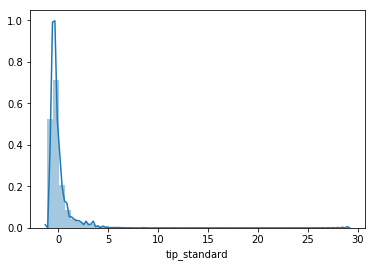

In [94]:
# distribution plot of tips for presentation
sns.distplot(taxi_testm2.tip_standard)

In [121]:
taxi_testm.head()

,pickup_dt,dropoff_dt,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,trip_time,...,RatecodeID_4,RatecodeID_5,payment_type_1,payment_type_2,payment_type_3,payment_type_4,fare_dist_interact,log_tip,log_fare,tip_standard
0,2018-10-25 10:01:35,2018-10-25 10:13:57,1.70,1,262,229,9.5,0.00,0.00,12.366667,...,0,0,0,1,0,0,16.150,-inf,2.251292,-0.763978
1,2018-10-05 20:17:42,2018-10-05 20:37:16,3.23,1,249,87,15.5,3.36,0.00,19.566667,...,0,0,1,0,0,0,50.065,1.211941,2.740840,0.576827
2,2018-10-15 09:24:44,2018-10-15 09:42:57,2.66,1,100,236,13.5,0.00,0.00,18.216667,...,0,0,0,1,0,0,35.910,-inf,2.602690,-0.763978
3,2018-10-25 16:10:09,2018-10-25 16:18:11,0.90,1,264,264,7.0,1.00,0.00,8.033333,...,0,0,1,0,0,0,6.300,0.000000,1.945910,-0.364929
4,2018-10-10 18:56:38,2018-10-10 19:51:10,18.37,2,132,48,52.0,12.61,5.76,54.533333,...,0,0,1,0,0,0,955.240,2.534490,3.951244,4.268033


In [122]:
# adding location ids to test
location_ids = pd.read_csv('taxi+_zone_lookup.csv')

In [123]:
location_ids.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [124]:
# merging pickup first then dropoff
taxi_testm = taxi_testm.merge(location_ids, how='left', left_on='PULocationID', right_on='LocationID')

In [129]:
# dropping and renaming columns to perform next merge
taxi_testm.drop(['LocationID', 'service_zone'], axis=1, inplace=True)
taxi_testm.rename(columns={'Borough':'PUBorough', 'Zone':'PUZone'}, inplace=True)
taxi_testm.head()

,pickup_dt,dropoff_dt,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,trip_time,...,payment_type_1,payment_type_2,payment_type_3,payment_type_4,fare_dist_interact,log_tip,log_fare,tip_standard,PUBorough,PUZone
0,2018-10-25 10:01:35,2018-10-25 10:13:57,1.70,1,262,229,9.5,0.00,0.00,12.366667,...,0,1,0,0,16.150,-inf,2.251292,-0.763978,Manhattan,Yorkville East
1,2018-10-05 20:17:42,2018-10-05 20:37:16,3.23,1,249,87,15.5,3.36,0.00,19.566667,...,1,0,0,0,50.065,1.211941,2.740840,0.576827,Manhattan,West Village
2,2018-10-15 09:24:44,2018-10-15 09:42:57,2.66,1,100,236,13.5,0.00,0.00,18.216667,...,0,1,0,0,35.910,-inf,2.602690,-0.763978,Manhattan,Garment District
3,2018-10-25 16:10:09,2018-10-25 16:18:11,0.90,1,264,264,7.0,1.00,0.00,8.033333,...,1,0,0,0,6.300,0.000000,1.945910,-0.364929,Unknown,NV
4,2018-10-10 18:56:38,2018-10-10 19:51:10,18.37,2,132,48,52.0,12.61,5.76,54.533333,...,1,0,0,0,955.240,2.534490,3.951244,4.268033,Queens,JFK Airport


In [130]:
taxi_testm = taxi_testm.merge(location_ids, how='left', left_on='DOLocationID', right_on='LocationID')
taxi_testm.head()

,pickup_dt,dropoff_dt,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,trip_time,...,fare_dist_interact,log_tip,log_fare,tip_standard,PUBorough,PUZone,LocationID,Borough,Zone,service_zone
0,2018-10-25 10:01:35,2018-10-25 10:13:57,1.70,1,262,229,9.5,0.00,0.00,12.366667,...,16.150,-inf,2.251292,-0.763978,Manhattan,Yorkville East,229,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone
1,2018-10-05 20:17:42,2018-10-05 20:37:16,3.23,1,249,87,15.5,3.36,0.00,19.566667,...,50.065,1.211941,2.740840,0.576827,Manhattan,West Village,87,Manhattan,Financial District North,Yellow Zone
2,2018-10-15 09:24:44,2018-10-15 09:42:57,2.66,1,100,236,13.5,0.00,0.00,18.216667,...,35.910,-inf,2.602690,-0.763978,Manhattan,Garment District,236,Manhattan,Upper East Side North,Yellow Zone
3,2018-10-25 16:10:09,2018-10-25 16:18:11,0.90,1,264,264,7.0,1.00,0.00,8.033333,...,6.300,0.000000,1.945910,-0.364929,Unknown,NV,264,Unknown,NV,NaN
4,2018-10-10 18:56:38,2018-10-10 19:51:10,18.37,2,132,48,52.0,12.61,5.76,54.533333,...,955.240,2.534490,3.951244,4.268033,Queens,JFK Airport,48,Manhattan,Clinton East,Yellow Zone


In [131]:
taxi_testm.drop(['LocationID', 'service_zone'], axis=1, inplace=True)
taxi_testm.rename(columns={'Borough':'DOBorough', 'Zone':'DOZone'}, inplace=True)

In [139]:
taxi_testm.head()

,pickup_dt,dropoff_dt,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,trip_time,...,payment_type_3,payment_type_4,fare_dist_interact,log_tip,log_fare,tip_standard,PUBorough,PUZone,DOBorough,DOZone
0,2018-10-25 10:01:35,2018-10-25 10:13:57,1.70,1,262,229,9.5,0.00,0.00,12.366667,...,0,0,16.150,-inf,2.251292,-0.763978,Manhattan,Yorkville East,Manhattan,Sutton Place/Turtle Bay North
1,2018-10-05 20:17:42,2018-10-05 20:37:16,3.23,1,249,87,15.5,3.36,0.00,19.566667,...,0,0,50.065,1.211941,2.740840,0.576827,Manhattan,West Village,Manhattan,Financial District North
2,2018-10-15 09:24:44,2018-10-15 09:42:57,2.66,1,100,236,13.5,0.00,0.00,18.216667,...,0,0,35.910,-inf,2.602690,-0.763978,Manhattan,Garment District,Manhattan,Upper East Side North
4,2018-10-10 18:56:38,2018-10-10 19:51:10,18.37,2,132,48,52.0,12.61,5.76,54.533333,...,0,0,955.240,2.534490,3.951244,4.268033,Queens,JFK Airport,Manhattan,Clinton East
5,2018-10-30 17:06:53,2018-10-30 17:15:21,1.00,1,75,263,7.0,0.00,0.00,8.466667,...,0,0,7.000,-inf,1.945910,-0.763978,Manhattan,East Harlem South,Manhattan,Yorkville West


In [135]:
# removing locationid not recognized. this improved the model a little bit
taxi_testm = taxi_testm[taxi_testm.PUZone != 'NV']

In [141]:
# testing borough dummies
pu_borough_dummies = pd.get_dummies(taxi_testm.PUBorough, prefix='PUBorough')
taxi_testm = pd.concat([taxi_testm, pu_borough_dummies], axis=1)
taxi_testm.head()

,pickup_dt,dropoff_dt,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,trip_time,...,tip_standard,PUBorough,PUZone,DOBorough,DOZone,PUBorough_Bronx,PUBorough_Brooklyn,PUBorough_Manhattan,PUBorough_Queens,PUBorough_Unknown
0,2018-10-25 10:01:35,2018-10-25 10:13:57,1.70,1,262,229,9.5,0.00,0.00,12.366667,...,-0.763978,Manhattan,Yorkville East,Manhattan,Sutton Place/Turtle Bay North,0,0,1,0,0
1,2018-10-05 20:17:42,2018-10-05 20:37:16,3.23,1,249,87,15.5,3.36,0.00,19.566667,...,0.576827,Manhattan,West Village,Manhattan,Financial District North,0,0,1,0,0
2,2018-10-15 09:24:44,2018-10-15 09:42:57,2.66,1,100,236,13.5,0.00,0.00,18.216667,...,-0.763978,Manhattan,Garment District,Manhattan,Upper East Side North,0,0,1,0,0
4,2018-10-10 18:56:38,2018-10-10 19:51:10,18.37,2,132,48,52.0,12.61,5.76,54.533333,...,4.268033,Queens,JFK Airport,Manhattan,Clinton East,0,0,0,1,0
5,2018-10-30 17:06:53,2018-10-30 17:15:21,1.00,1,75,263,7.0,0.00,0.00,8.466667,...,-0.763978,Manhattan,East Harlem South,Manhattan,Yorkville West,0,0,1,0,0


In [152]:
# tested just Manhattan but model was worse so these were ultimately scrapped
taxi_testm3 = taxi_testm[taxi_testm.PUBorough == 'Manhattan']
taxi_testm4 = taxi_testm3[taxi_testm3.tip_amount != 0]

In [174]:
# resetting second frame since changes were made to original
taxi_testm2 = taxi_testm[taxi_testm.tip_amount != 0]

In [171]:
taxi_testm.reset_index(drop=True, inplace=True)
taxi_testm.head()

,pickup_dt,dropoff_dt,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,trip_time,...,PUBorough,PUZone,DOBorough,DOZone,PUBorough_Bronx,PUBorough_Brooklyn,PUBorough_Manhattan,PUBorough_Queens,PUBorough_Unknown,Is_UES
0,2018-10-25 10:01:35,2018-10-25 10:13:57,1.70,1,262,229,9.5,0.00,0.00,12.366667,...,Manhattan,Yorkville East,Manhattan,Sutton Place/Turtle Bay North,0,0,1,0,0,0
1,2018-10-05 20:17:42,2018-10-05 20:37:16,3.23,1,249,87,15.5,3.36,0.00,19.566667,...,Manhattan,West Village,Manhattan,Financial District North,0,0,1,0,0,0
2,2018-10-15 09:24:44,2018-10-15 09:42:57,2.66,1,100,236,13.5,0.00,0.00,18.216667,...,Manhattan,Garment District,Manhattan,Upper East Side North,0,0,1,0,0,1
3,2018-10-10 18:56:38,2018-10-10 19:51:10,18.37,2,132,48,52.0,12.61,5.76,54.533333,...,Queens,JFK Airport,Manhattan,Clinton East,0,0,0,1,0,0
4,2018-10-30 17:06:53,2018-10-30 17:15:21,1.00,1,75,263,7.0,0.00,0.00,8.466667,...,Manhattan,East Harlem South,Manhattan,Yorkville West,0,0,1,0,0,0


In [173]:
# creating dummy for dropoffs on the upper east side
from tqdm import tqdm_notebook
taxi_testm['Is_UES'] = 0
for i in tqdm_notebook(range(len(taxi_testm))):
    if taxi_testm.DOZone[i] == 'Upper East Side North':
        taxi_testm.Is_UES[i] = 1
    elif taxi_testm.DOZone[i] == 'Upper East Side South':
        taxi_testm.Is_UES[i] = 1
taxi_testm.Is_UES.unique()

C:\Users\dlm66\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\dlm66\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


array([0, 1], dtype=int64)

In [176]:
# aaaand no correlation once again!
taxi_testm2.corr()['tip_amount']['Is_UES']

-0.08658476847793069

In [194]:
taxi_testm.columns

Index(['pickup_dt', 'dropoff_dt', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'fare_amount', 'tip_amount',
       'tolls_amount', 'trip_time', 'weather_summary_Light Rain',
       'weather_summary_Mostly Cloudy', 'RatecodeID_1', 'RatecodeID_2',
       'RatecodeID_3', 'RatecodeID_4', 'RatecodeID_5', 'payment_type_1',
       'payment_type_2', 'payment_type_3', 'payment_type_4',
       'fare_dist_interact', 'log_tip', 'log_fare', 'tip_standard',
       'PUBorough', 'PUZone', 'DOBorough', 'DOZone', 'PUBorough_Bronx',
       'PUBorough_Brooklyn', 'PUBorough_Manhattan', 'PUBorough_Queens',
       'PUBorough_Unknown', 'Is_UES'],
      dtype='object')

In [216]:
# well after all that the model remains unchanged
f='tip_amount~fare_amount+tolls_amount+RatecodeID_1+RatecodeID_2+RatecodeID_3+RatecodeID_4'
taxi_model4 = ols(f, taxi_testm2).fit()
taxi_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tip_amount   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                 2.044e+04
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:56:58   Log-Likelihood:                -52006.
No. Observations:               32788   AIC:                         1.040e+05
Df Residuals:                   32781   BIC:                         1.041e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.6155      0.198     -8.166      0.000      -2.003      -1.228
fare_amount      0.1846      0.001    207.941      0.000       0.183       0.186
tolls_amount     0.2291      0.006     38.564      0.000       0.217       0.241
RatecodeID_1     1.9046      0.195      9.755      0.000       1.522       2.287
RatecodeID_2     1.9415      0.193     10.047      0.000       1.563       2.320
RatecodeID_3     1.6408      0.251      6.543      0.000       1.149       2.132
RatecodeID_4     2.0257      0.306      6.609      0.000       1.425       2.626
==============================================================================
Omnibus:                    38453.490   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        110395768.601
Skew:                           5.069   Prob(JB):                         0.00
Kurtosis:                     287.085   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
f='tip_amount~fare_amount+tolls_amount+RatecodeID_1+RatecodeID_2+RatecodeID_3+RatecodeID_4+payment_type_1+payment_type_2'
taxi_model = ols(f, taxi_testm).fit()
taxi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tip_amount   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     9036.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:52:03   Log-Likelihood:                -91843.
No. Observations:               48845   AIC:                         1.837e+05
Df Residuals:                   48836   BIC:                         1.838e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.9376      0.179    -27.554      0.000      -5.289      -4.586
fare_amount        0.1089      0.001    118.072      0.000       0.107       0.111
tolls_amount       0.2342      0.007     35.985      0.000       0.221       0.247
RatecodeID_1       3.1704      0.144     22.039      0.000       2.888       3.452
RatecodeID_2       3.4110      0.147     23.219      0.000       3.123       3.699
RatecodeID_3       3.0224      0.232     13.020      0.000       2.567       3.477
RatecodeID_4       4.0955      0.283     14.487      0.000       3.541       4.650
payment_type_1     2.8941      0.103     28.036      0.000       2.692       3.096
payment_type_2     0.3342      0.104      3.222      0.001       0.131       0.538
==============================================================================
Omnibus:                    33643.719   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19422687.675
Skew:                           2.038   Prob(JB):                         0.00
Kurtosis:                     100.605   Cond. No.                         866.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
# creating residual data
import scipy as sp
residuals2 = taxi_model4.predict() - taxi_testm2.tip_amount
residuals1 = taxi_model.predict() - taxi_testm.tip_amount

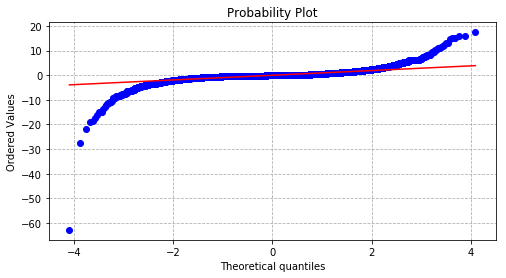

In [214]:
# not as bad as i thought!
fig, ax = plt.subplots(figsize=(8,4))
sp.stats.probplot(residuals2, fit=True, plot=ax)
plt.grid(linestyle='--')

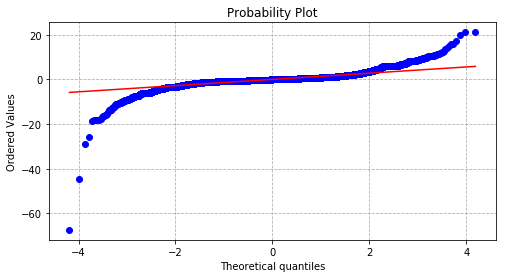

In [215]:
# ditto for here
fig, ax = plt.subplots(figsize=(8,4))
sp.stats.probplot(residuals1, fit=True, plot=ax)
plt.grid(linestyle='--')

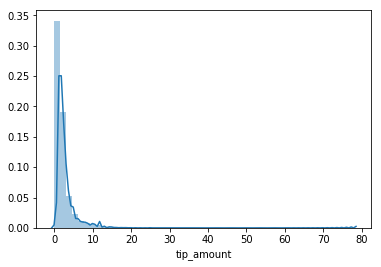

In [217]:
sns.distplot(taxi_testm.tip_amount)